In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

titles = {"AGP_AGE": "Age (AGP)", "AGP_BMI": "BMI (AGP)", "IBD200_CDAI": "CDAI (IBD200)"}

In [2]:
def get_confidence_curve(data):
    confidence_curves = []
    oracle_curves = []

    for seed in range(10):
        with open(f"../results/{data}/result_GP_MK_{seed}.json") as f:
            d = json.load(f)

        y_true = np.array(d["test_y_true"])
        y_pred = np.array(d["test_y_pred"])
        y_variance = np.array(d["test_y_variance"])

        confidence_error = ((y_true - y_pred) ** 2)[np.argsort(y_variance)]
        confidence_curve = [np.sqrt(np.mean(confidence_error[:i+1])) for i in range(len(y_true))][::-1]
        confidence_curves.append(confidence_curve)
        
        oracle_error = np.sort((y_true - y_pred) ** 2)
        oracle_curve = [np.sqrt(np.mean(oracle_error[:i+1])) for i in range(len(y_true))][::-1]
        oracle_curves.append(oracle_curve)

    return confidence_curves, oracle_curves

In [3]:
def plot_confidence_curve(data):
    confidence_curves, oracle_curves = get_confidence_curve(data)
    fraction = np.linspace(0, 1, len(confidence_curves[0]) + 1)[:-1]

    plt.figure(figsize = (4, 4))

    mean = np.array(confidence_curves).mean(axis = 0)
    std = np.array(confidence_curves).std(axis = 0)
    plt.plot(fraction, mean, linestyle = "solid", label = "Confidence curve")
    plt.fill_between(fraction, mean - std, mean + std, alpha = 0.2)

    mean = np.array(oracle_curves).mean(axis = 0)
    std = np.array(oracle_curves).std(axis = 0)
    plt.plot(fraction, mean, linestyle = "dashed", label = "Oracle curve")
    plt.fill_between(fraction, mean - std, mean + std, alpha = 0.2)

    plt.xlabel("Fraction of removed data", fontsize = "x-large")
    plt.ylabel("RMSE", fontsize = "x-large")
    plt.xlim(left = 0, right = 1)
    plt.ylim(bottom = 0)
    plt.legend(loc = "lower left", fontsize = "medium")
    plt.title(titles[data], fontsize = "x-large")
    plt.grid()

    plt.tight_layout()
    plt.savefig(f"../figures/{data}_GP_MK_confidence_curve.pdf", bbox_inches = "tight")
    plt.show()

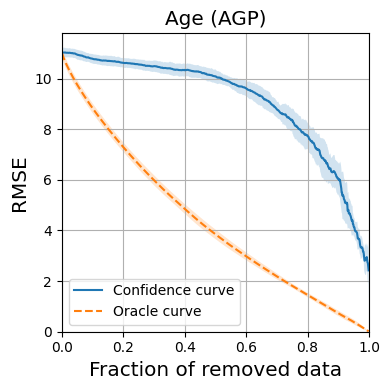

In [4]:
plot_confidence_curve("AGP_AGE")

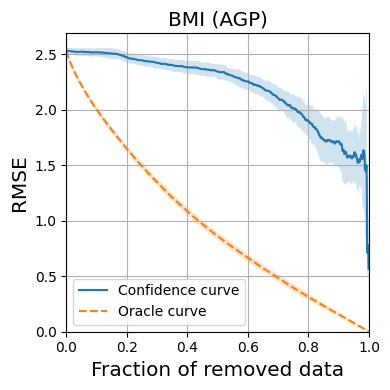

In [5]:
plot_confidence_curve("AGP_BMI")

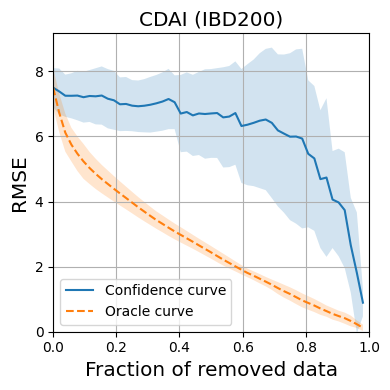

In [6]:
plot_confidence_curve("IBD200_CDAI")